In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('drive/MyDrive/Infosys Internship/updated_movies_data.csv')
df.head()

,id,budget,genres,homepage,imdb_id,original_language,movie_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,keywords,cast,crew,revenue
0,653346,160000000,"Science Fiction, Adventure, Action",https://www.20thcenturystudios.com/movies/king...,tt11389872,en,Kingdom of the Planet of the Apes,Several generations in the future following Ca...,6245.898,/gKkl37BQuKTanygYQG1pyYgLVgf.jpg,...,2024-05-08,145,English,Released,No one can stop the reign.,Kingdom of the Planet of the Apes,"empire, kingdom, gorilla, dystopia, eagle, seq...","Owen Teague, Freya Allan, Kevin Durand, Peter ...","Wes Ball, Joe Hartwick Jr., Peter Chernin, Ric...",359039904.0
1,929590,50000000,"War, Action, Drama",https://a24films.com/films/civil-war,tt17279496,en,Civil War,"In the near future, a group of war journalists...",2730.901,/sh7Rg8Er3tFcN9BpKIPOMvALgZd.jpg,...,2024-04-10,109,English,Released,Welcome to the frontline.,Civil War,"sniper, new york city, race against time, wash...","Kirsten Dunst, Wagner Moura, Cailee Spaeny, St...","Andrew Macdonald, Allon Reich, Gregory Goodman...",114097977.0
2,823464,150000000,"Science Fiction, Action, Adventure",https://www.godzillaxkongmovie.com,tt14539740,en,Godzilla x Kong: The New Empire,"Following their explosive showdown, Godzilla a...",2726.153,/z1p34vh7dEOnLDmyCrlUVLuoDzd.jpg,...,2024-03-27,115,English,Released,Rise together or fall alone.,Godzilla x Kong: The New Empire,"giant monster, sequel, dinosaur, monkey, kaiju...","Rebecca Hall, Brian Tyree Henry, Dan Stevens, ...","Adam Wingard, Thomas Tull, Jon Jashni, Mary Pa...",567156493.0
3,719221,8000000,"Horror, Thriller",https://www.tarotmovie.com,tt14088510,en,Tarot,When a group of friends recklessly violate the...,2349.378,/gAEUXC37vl1SnM7PXsHTF23I2vq.jpg,...,2024-05-01,92,English,Released,Your fate is in the cards.,Tarot,"tarot cards, fate, slasher, group of friends, ...","Harriet Slater, Adain Bradley, Avantika, Jacob...","Anna Halberg, Spenser Cohen, Spenser Cohen, An...",41989392.0
4,573435,100000000,"Action, Crime, Thriller",https://www.badboys.movie,tt4919268,en,Bad Boys: Ride or Die,"After their late former Captain is framed, Low...",2486.516,/nP6RliHjxsz4irTKsxe8FRhKZYl.jpg,...,2024-06-05,115,English,Released,Miami's finest are now its most wanted.,Bad Boys: Ride or Die,"miami, florida, on the run, police detective, ...","Will Smith, Martin Lawrence, Vanessa Hudgens, ...","George Gallo, Jerry Bruckheimer, Adil El Arbi,...",104600000.0


In [ ]:
df.columns

Index(['id', 'budget', 'genres', 'homepage', 'imdb_id', 'original_language',
       'movie_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'keywords',
       'cast', 'crew', 'revenue'],
      dtype='object')

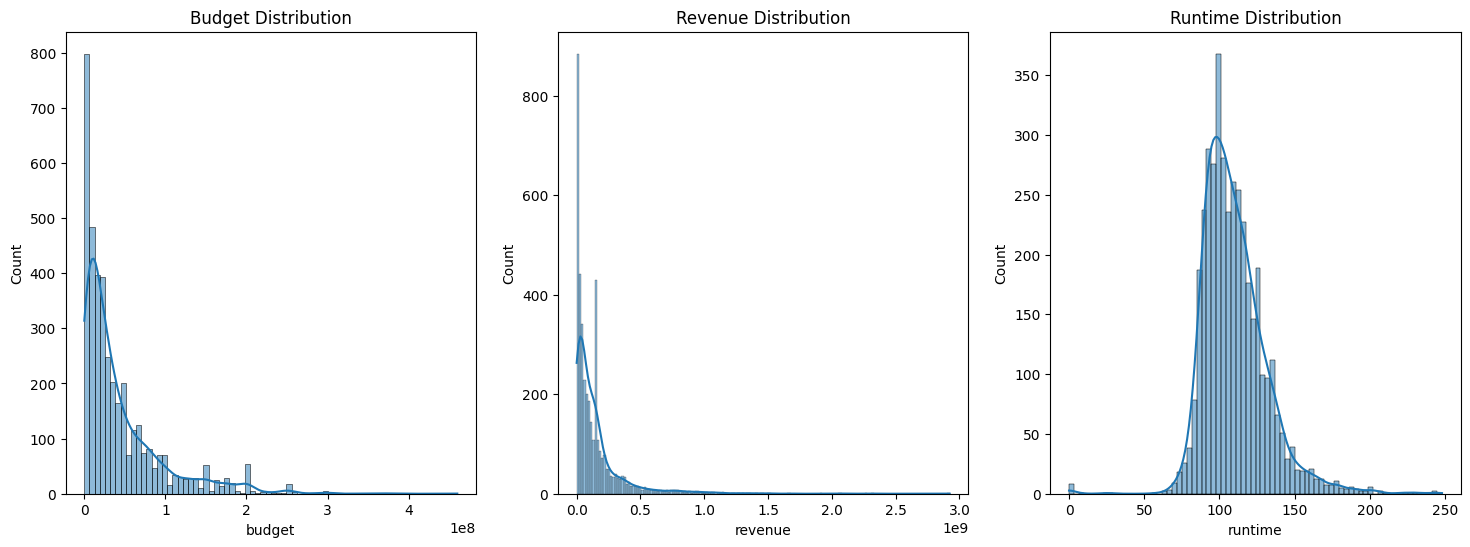

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['budget'], kde=True)
plt.title('Budget Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['revenue'], kde=True)
plt.title('Revenue Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['runtime'], kde=True)
plt.title('Runtime Distribution')

plt.show()

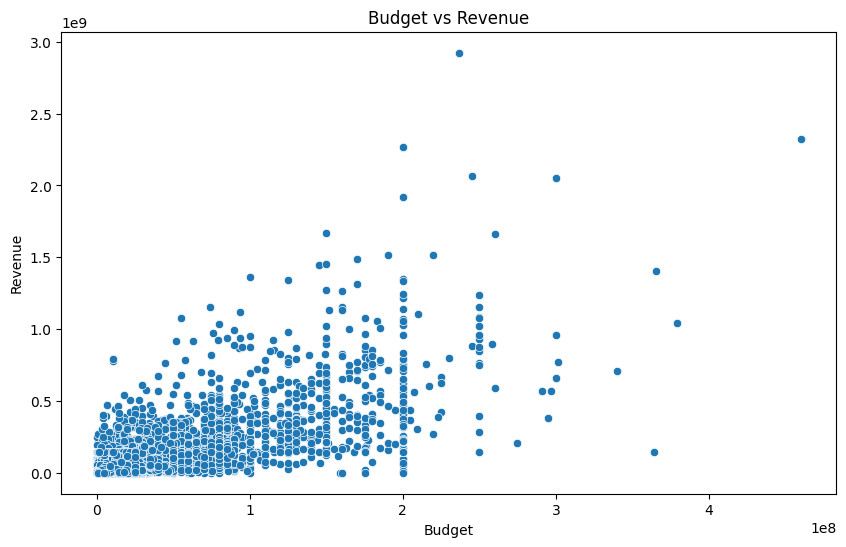

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Split the genres into lists
df['genres'] = df['genres'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
print(df['genres'].head())

0    [Science Fiction, Adventure, Action]
1                    [War, Action, Drama]
2    [Science Fiction, Action, Adventure]
3                      [Horror, Thriller]
4               [Action, Crime, Thriller]
Name: genres, dtype: object


In [ ]:
# Expand the dataframe to have one row per genre per movie
genre_expanded_df = df.explode('genres')
print(genre_expanded_df.head())

       id     budget           genres  \
0  653346  160000000  Science Fiction   
0  653346  160000000        Adventure   
0  653346  160000000           Action   
1  929590   50000000              War   
1  929590   50000000           Action   

                                            homepage     imdb_id  \
0  https://www.20thcenturystudios.com/movies/king...  tt11389872   
0  https://www.20thcenturystudios.com/movies/king...  tt11389872   
0  https://www.20thcenturystudios.com/movies/king...  tt11389872   
1               https://a24films.com/films/civil-war  tt17279496   
1               https://a24films.com/films/civil-war  tt17279496   

  original_language                        movie_title  \
0                en  Kingdom of the Planet of the Apes   
0                en  Kingdom of the Planet of the Apes   
0                en  Kingdom of the Planet of the Apes   
1                en                          Civil War   
1                en                          Civil War

In [ ]:
import ast
import re

def clean_genre(genre):
    try:
        # If the genre is a list of dictionaries or a dictionary, extract the names
        if genre.startswith("[{'id'") or genre.startswith("{'id'"):
            genre_list = ast.literal_eval(genre)
            if isinstance(genre_list, list):
                return ', '.join([g['name'] for g in genre_list if 'name' in g])
            elif isinstance(genre_list, dict):
                return genre_list.get('name', None)
        else:
            # Remove "name " prefix if it exists
            genre = re.sub(r"^name\s", "", genre)

            # Remove non-alphanumeric characters except spaces
            cleaned_genre = re.sub(r"[^a-zA-Z\s]", "", genre).strip()

            return cleaned_genre
    except Exception as e:
        return None


# Apply the function to clean the genres column
genre_expanded_df['genres'] = genre_expanded_df['genres'].apply(clean_genre)

# Remove any rows where genres could not be cleaned properly (still None or malformed)
genre_expanded_df = genre_expanded_df[genre_expanded_df['genres'].notnull()]
print(genre_expanded_df['genres'].unique())

['Science Fiction' 'Adventure' 'Action' 'War' 'Drama' 'Horror' 'Thriller'
 'Crime' 'Comedy' 'Animation' 'Family' 'Fantasy' 'Mystery' 'History'
 'Romance' 'Music' 'TV Movie' 'Western' 'Documentary']


In [ ]:
# Group by genre and calculate mean revenue
genre_revenue = genre_expanded_df.groupby('genres')['revenue'].mean().reset_index()
genere_revenue = genre_revenue.sort_values(by='revenue', ascending=False) # sorted it in ascedning order
genere_revenue.head()

,genres,revenue
2,Animation,2.870749e+08
1,Adventure,2.804976e+08
7,Family,2.432933e+08
8,Fantasy,2.293267e+08
14,Science Fiction,2.199906e+08


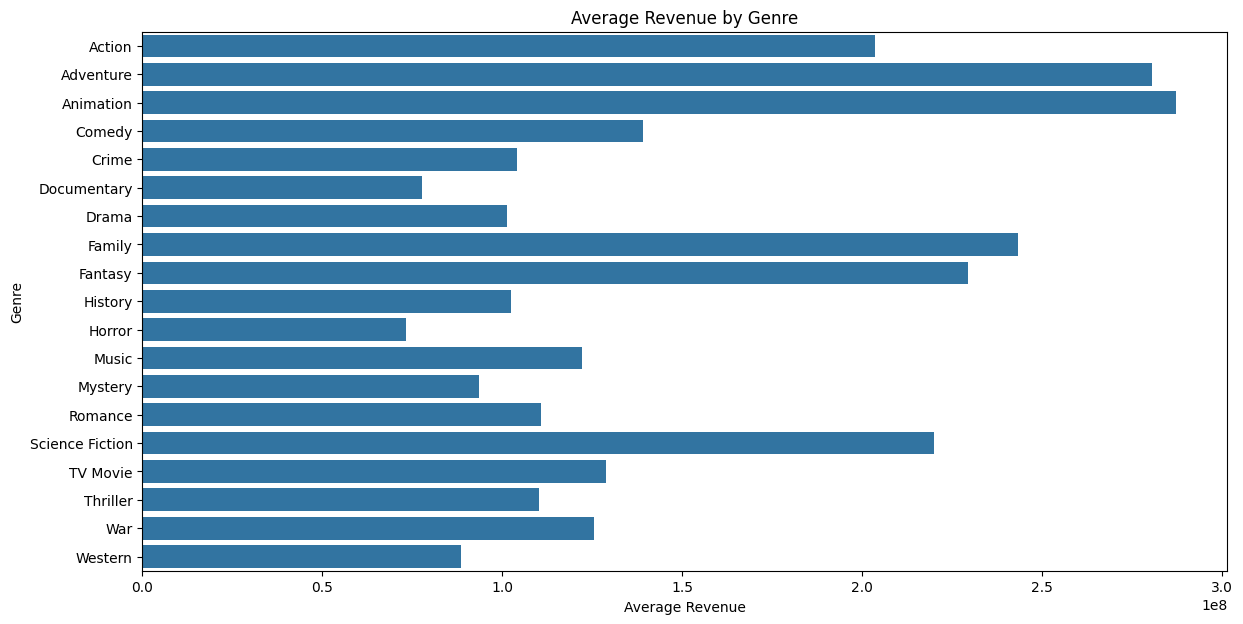

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x='revenue', y='genres', data=genre_revenue)
plt.title('Average Revenue by Genre')
plt.xlabel('Average Revenue')
plt.ylabel('Genre')
plt.show()